In [19]:
#Installing the required packages
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt

In [29]:
#Installing the dataset (This dataset is a CSV file)
weather = pd.read_csv('daily_data.csv')

In [36]:
#Exploring the dataset 
print(weather.head()) # showing the first 5 rows of the dataset
print(weather.describe()) # showing the statistical summary of the dataset

         DATE  BackupElevation  BackupLatitude  BackupLongitude  \
0  2015-01-01              260         42.6918        -73.83109   
1  2015-01-02              260         42.6918        -73.83109   
2  2015-01-03              260         42.6918        -73.83109   
3  2015-01-04              260         42.6918        -73.83109   
4  2015-01-05              260         42.6918        -73.83109   

   DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
0                              7.0                            25.0   
1                             17.0                            32.0   
2                             18.0                            27.0   
3                             35.0                            39.0   
4                             11.0                            27.0   

   DailyAverageRelativeHumidity  DailyAverageSeaLevelPressure  \
0                          46.0                         29.97   
1                          57.0               

In [31]:
#Cleaning the dataset (Getting rid of columns that are not needed for this analysis)
#Dropping unnecessary columns
weather = weather.drop(columns=['STATION', 'REPORT_TYPE', 'SOURCE', 'BackupEquipment', 'BackupElements', 'BackupName'])

In [33]:
#Changng the date column to datetime format
weather['DATE'] = pd.to_datetime(weather['DATE']).dt.date

In [34]:
#Making a line graph that shows percpitation over time
#chnaging the T in DailyPrecipitation to 0.001 
weather['DailyPrecipitation'] = weather['DailyPrecipitation'].replace({'T': 0.001})

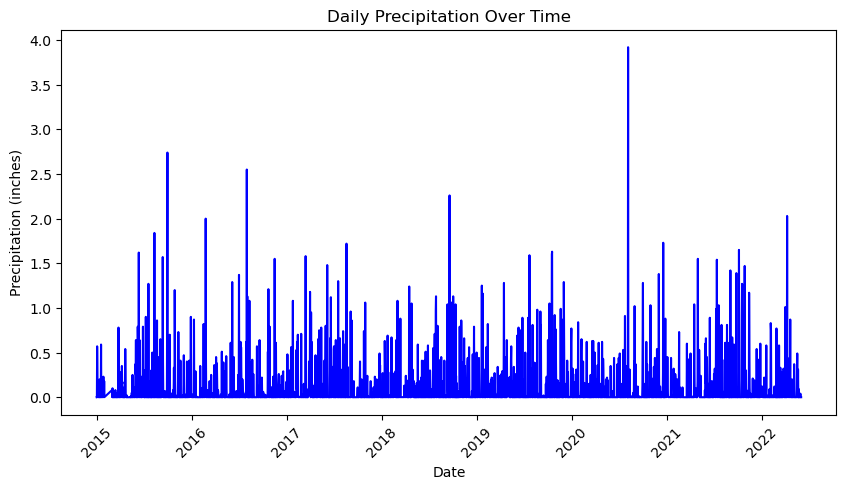

In [ ]:
#making a plot of percpitation over time
weather['DailyPrecipitation'] = pd.to_numeric(weather['DailyPrecipitation'], errors='coerce')

plt.figure(figsize=(10, 5))
plt.plot(weather['DATE'], weather['DailyPrecipitation'], color='blue')
plt.title('Daily Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.show()